# Import libraries

In [1]:
import numpy as np
import polars as pl
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, confusion_matrix



In [2]:
# Preprocess function

def preprocess(df):
    return df.with_columns([
        pl.when(
            pl.col('TotalCharges').is_null()
        ).then(
            pl.col('MonthlyCharges') * pl.col('tenure')
        ).otherwise(
            pl.col('TotalCharges')
        ).alias('TotalCharges')
    ])

In [3]:
# Read files

for df in ['X_train','X_val','X_test','y_train','y_val','y_test']:

    if df[0] == 'X':
        dataset = preprocess(pl.read_parquet(f'./datasets/{df}.parquet'))
    else:
        dataset = pl.read_parquet(f'./datasets/{df}.parquet')
    globals()[df] = dataset


In [4]:
# Baseline tests
# We choose f1-score in order to address better imbalaced dataset

model_name = []
f1_train = []
f1_val = []
data_proportion_training = []

for model in [RandomForestClassifier, LGBMClassifier, XGBClassifier]:

    for data_proportion in [x/10 for x in range(1,11)]: 

        data_rows = int(X_train.shape[0] * data_proportion)
        model_inst = model()
        model_inst.fit(X_train.head(data_rows),y_train.head(data_rows))
        model_name.append(model.__name__)
        f1_train.append(f1_score(y_train, model_inst.predict(X_train)))
        f1_val.append(f1_score(y_val, model_inst.predict(X_val)))
        data_proportion_training.append(data_proportion)

C:\Users\gabriel.gomes\AppData\Local\Temp\ipykernel_40524\1624003184.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_inst.fit(X_train.head(data_rows),y_train.head(data_rows))
C:\Users\gabriel.gomes\AppData\Local\Temp\ipykernel_40524\1624003184.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_inst.fit(X_train.head(data_rows),y_train.head(data_rows))
C:\Users\gabriel.gomes\AppData\Local\Temp\ipykernel_40524\1624003184.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_inst.fit(X_train.head(data_rows),y_train.head(data_rows))
C:\Users\gabriel.gomes\AppData\Local\Temp\ipykernel_40524\1624003184.py:15: DataConversionWarning: A column-v

[LightGBM] [Info] Number of positive: 147, number of negative: 416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 563, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261101 -> initscore=-1.040253
[LightGBM] [Info] Start training from score -1.040253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 291, number of negative: 835
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 1126, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258437 -> initscore=-1.054108
[LightGBM] [Info] Start training from score -1.054108


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 423, number of negative: 1267
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 1690, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250296 -> initscore=-1.097035
[LightGBM] [Info] Start training from score -1.097035


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 575, number of negative: 1678
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 2253, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255215 -> initscore=-1.070988
[LightGBM] [Info] Start training from score -1.070988


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 728, number of negative: 2089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 2817, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258431 -> initscore=-1.054140
[LightGBM] [Info] Start training from score -1.054140


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 895, number of negative: 2485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264793 -> initscore=-1.021204
[LightGBM] [Info] Start training from score -1.021204


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1050, number of negative: 2893
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 3943, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266295 -> initscore=-1.013504
[LightGBM] [Info] Start training from score -1.013504


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1200, number of negative: 3307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266252 -> initscore=-1.013720
[LightGBM] [Info] Start training from score -1.013720


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1350, number of negative: 3720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266272 -> initscore=-1.013619
[LightGBM] [Info] Start training from score -1.013619


c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


In [5]:
results = pl.DataFrame(
    {'model':model_name,
    'f1_train':f1_train,
    'f1_val':f1_val,
    'data_proportion_training':data_proportion_training
    }
    )

In [9]:
# Auxiliary function to check overfit and model score

import plotly.graph_objects as go

def check_score_overfit(model_name):
    data_plot =  results.filter(
    pl.col('model') == model_name
    ).melt(
        id_vars=['model','data_proportion_training'],
        value_vars=['f1_train','f1_val']
    ).rename({
        'value':'f1_score'
    })
    
    fig = go.Figure(
        px.line(
            data_plot.to_pandas(), 
            x='data_proportion_training', 
            y='f1_score', 
            color='variable',
            title=model_name
            )
        )

    # setting the y-axis range from -3 to 3
    fig.update_layout(yaxis_range=[0,1])


    fig.show()

In [10]:
for model in results['model'].unique().to_list():
    check_score_overfit(model)

# Decision
### Proceed with LightGBM as it has less overfit with this data

# Confidence Intervals

In [63]:
X = pl.concat(
    [X_train,X_val]
    ).to_pandas()

y = pl.concat(
    [y_train,y_val]
    ).to_pandas()

In [78]:
# Bootstrap

lgbm = LGBMClassifier(verbosity=-1)

sss = StratifiedShuffleSplit(n_splits=200, test_size=0.2)

recall_interval = []

precision_interval = []

for i in sss.split(X,y):

    lgbm.fit(X.iloc[i[0],:],y.loc[i[0],'target'])

    
    tn, fp, fn, tp = confusion_matrix(y.loc[i[1],'target'], lgbm.predict(X.iloc[i[1],:])).ravel()

    recall_interval.append(tp / (tp + fn))

    precision_interval.append(tp / (tp + fp))



In [85]:
recall_lower, recall_upper = np.quantile(recall_interval, 0.025), np.quantile(recall_interval, 0.975)

In [84]:
precision_lower, precision_upper = np.quantile(precision_interval, 0.025), np.quantile(precision_interval, 0.975)

In [87]:
print(
    f'''
Recall interval = {round(recall_lower*100)}% - {round(recall_upper*100)}%
Precision interval = {round(precision_lower*100)}% - {round(precision_upper*100)}%
      '''
)


Recall interval = 47% - 57%
Precision interval = 59% - 68%
      


# Final training and evaluation

In [11]:
final_model = LGBMClassifier()

final_model.fit(pl.concat([
    X_train,
    X_val
]),
pl.concat([
    y_train,
    y_val
]))




c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\gabriel.gomes\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Info] Number of positive: 1719, number of negative: 4760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 6479, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265319 -> initscore=-1.018505
[LightGBM] [Info] Start training from score -1.018505


LGBMClassifier()

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, final_model.predict(X_test)).ravel()

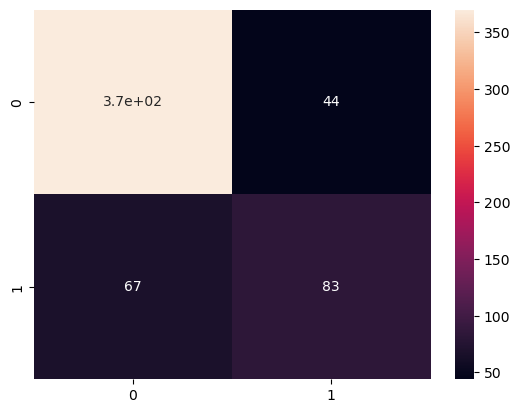

In [13]:
sns.heatmap(confusion_matrix(y_test, final_model.predict(X_test)), annot=True);

# What to be expected from this model?

In [ ]:
print(f'''
Recall = {round(tp / (tp + fn)*100)}%
Precision = {round(tp / (tp + fp)*100)}%
      ''')


Recall = 55%
Precision = 65%
      


In [92]:
# How much would it give in return?
df = pl.read_excel('./datasets/Customer-Churn.xlsx')

In [95]:
churn_no_mean = df.filter(
    pl.col('Churn') == 'No'
)['MonthlyCharges'].mean()

In [96]:
churn_yes_mean = df.filter(
    pl.col('Churn') == 'Yes'
)['MonthlyCharges'].mean()

In [ ]:
churn_yes_mean

74.44133226324237

In [91]:
df

'y_test'

In [93]:
# Real churn count

churn_count = df.filter(
    pl.col('Churn') == 'Yes'
 ).shape[0]

In [100]:
# ROI function

def product_ROI(recall, precision):

    true_positive_prediction_cost = churn_count * churn_yes_mean * 0.9 * recall * 12 # discount and anual

    false_positive_prediction_full_price = (churn_count * churn_no_mean * precision * 12) 

    false_positive_prediction_cost = false_positive_prediction_full_price - (false_positive_prediction_full_price * 0.9)

    return round(true_positive_prediction_cost - false_positive_prediction_cost)
        

In [103]:
print(f'Test dataset ROI: {product_ROI(0.55, 0.45):,}')
print(f'Lower bound ROI: {product_ROI(recall_lower, precision_lower):,}')
print(f'Upper bound ROI: {product_ROI(recall_upper, precision_upper):,}')

Test dataset ROI: 764,605
Lower bound ROI: 622,458
Upper bound ROI: 767,000
